<a href="https://colab.research.google.com/github/bcguilherme/arquivos-legais/blob/main/Low_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import pycaret
from pycaret.regression import *

In [ ]:
df=pd.read_csv("/content/sample_data/california_housing_train.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
reg=setup (data=df, target="median_house_value", session_id=8547, normalize_method= "robust", transform_target = True)

,Description,Value
0,Session id,8547
1,Target,median_house_value
2,Target type,Regression
3,Original data shape,"(17000, 9)"
4,Transformed data shape,"(17000, 9)"
5,Transformed train set shape,"(11900, 9)"
6,Transformed test set shape,"(5100, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models(fold=5, n_select=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,32231.9201,2438353142.9304,49300.5124,0.8189,0.2320,0.1701,0.6660
xgboost,Extreme Gradient Boosting,32584.4844,2512554035.2000,50031.3266,0.8134,0.2366,0.1717,1.1400
rf,Random Forest Regressor,33086.5264,2709553085.9202,51889.6194,0.7992,0.2392,0.1735,6.2120
et,Extra Trees Regressor,34969.8935,2954795200.8800,54242.0835,0.7807,0.2458,0.1813,2.7280
gbr,Gradient Boosting Regressor,38460.2485,3287818632.4571,57228.9896,0.7559,0.2645,0.2016,2.1920
dt,Decision Tree Regressor,45685.2510,5096732668.3920,71340.4097,0.6207,0.3311,0.2466,0.2860
lr,Linear Regression,50588.3953,6582254694.4000,80851.3156,0.5120,0.3428,0.2702,0.7500
ridge,Ridge Regression,50589.4531,6582652518.4000,80853.7344,0.5119,0.3428,0.2702,0.2680
br,Bayesian Ridge,50592.8633,6584113868.8000,80862.5344,0.5118,0.3428,0.2702,0.1220
ada,AdaBoost Regressor,60296.8566,6679482577.7269,81655.4955,0.5031,0.3924,0.3503,0.5080


Processing:   0%|          | 0/90 [00:00<?, ?it/s]

In [ ]:
lightgbm=create_model("lightgbm")



,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,31903.4501,2282991479.1560,47780.6601,0.8331,0.2256,0.1639
1,29973.7278,2113264039.6048,45970.2517,0.8321,0.2287,0.1721
2,30865.7913,2025297779.4587,45003.3085,0.8435,0.2203,0.1652
3,32956.9048,2513465519.4637,50134.4744,0.8115,0.2354,0.1703
4,31603.3081,2330889257.0323,48279.2839,0.8194,0.2244,0.1662
5,29886.1943,1982284194.3193,44522.8502,0.8463,0.2218,0.1638
6,33407.8085,2683398664.9068,51801.5315,0.8271,0.2213,0.1609
7,35210.2686,3116722826.3693,55827.6171,0.7743,0.2595,0.1862
8,31350.5104,2327904406.5262,48248.3617,0.8271,0.2303,0.1685


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
xgboost=create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,31868.3965,2357115904.0000,48550.1367,0.8277,0.2305,0.1636
1,30450.7891,2105479808.0000,45885.5078,0.8327,0.2311,0.1737
2,31006.1445,2114239104.0000,45980.8555,0.8367,0.2237,0.1656
3,33705.1445,2726822912.0000,52218.9883,0.7955,0.2445,0.1737
4,31641.4258,2332687616.0000,48297.9062,0.8192,0.2258,0.1664
5,29936.4043,2038364544.0000,45148.2500,0.8420,0.2275,0.1670
6,34112.7422,2729152000.0000,52241.2852,0.8241,0.2251,0.1656
7,35837.1680,3462434560.0000,58842.4570,0.7492,0.2724,0.1867
8,32151.3438,2469681408.0000,49695.8906,0.8166,0.2362,0.1714


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
rf=create_model("rf")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,32140.3581,2465418806.3619,49652.9839,0.8198,0.2292,0.1635
1,30608.4860,2300895949.2361,47967.6552,0.8172,0.2331,0.1724
2,31255.6000,2296278370.1627,47919.4989,0.8226,0.2223,0.1645
3,33774.6724,2760509653.3730,52540.5525,0.7930,0.2420,0.1757
4,31714.5061,2377659581.7388,48761.2508,0.8158,0.2274,0.1689
5,30083.0773,2137628158.3258,46234.4910,0.8343,0.2246,0.1645
6,34909.9171,3085907636.8841,55550.9463,0.8011,0.2326,0.1660
7,36487.9845,3540087582.2298,59498.6351,0.7436,0.2737,0.1932
8,32299.5220,2629176546.4814,51275.4966,0.8048,0.2410,0.1734


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

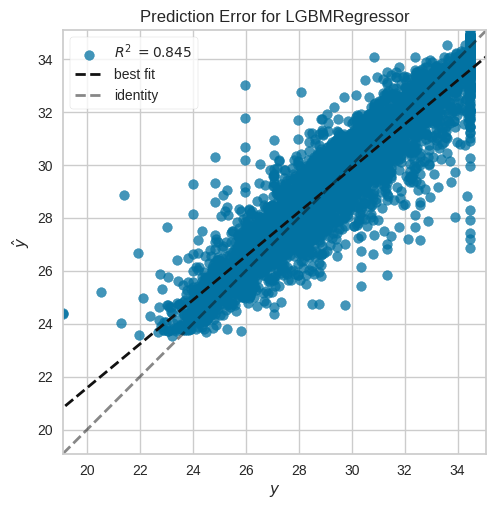

In [ ]:
#prediction error plot
plot_model(lightgbm, plot="error")

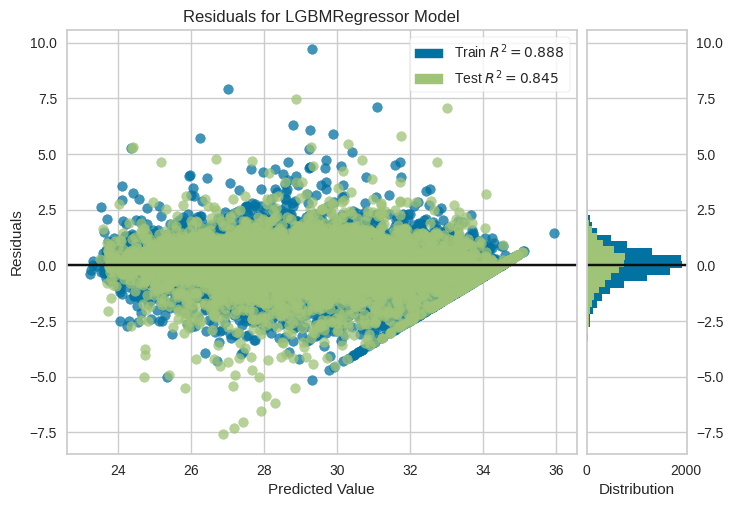

In [ ]:
#residual plot
plot_model(lightgbm)

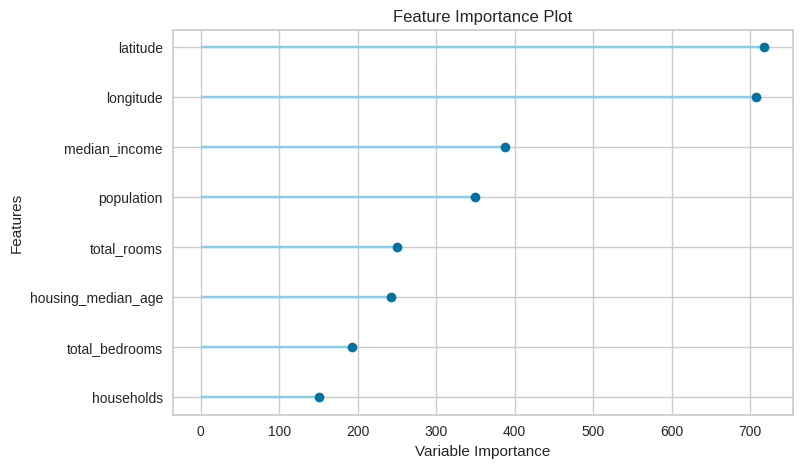

In [ ]:
#importance features
plot_model(lightgbm, plot="feature")

In [ ]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
predict_model(lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,31495.6805,2341597892.6486,48390.0599,0.8265,0.2255,0.1630


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,prediction_label
10785,-120.690002,37.590000,27.0,1170.0,227.0,660.0,222.0,2.3906,25.666145,91906.519748
7495,-118.360001,34.070000,40.0,1821.0,447.0,777.0,441.0,2.3375,32.652122,320228.618300
6073,-118.220001,33.830002,44.0,1792.0,404.0,1115.0,358.0,3.9091,29.102198,210308.151142
15875,-122.419998,37.740002,52.0,2713.0,624.0,1370.0,594.0,4.6547,32.201740,358254.960263
14917,-122.230003,37.810001,52.0,2315.0,292.0,861.0,258.0,8.8793,33.412487,444363.949749
...,...,...,...,...,...,...,...,...,...,...
12949,-121.839996,37.349998,20.0,3375.0,867.0,4610.0,860.0,2.6894,29.311251,156909.623222
13308,-121.919998,37.320000,39.0,836.0,254.0,704.0,272.0,3.5256,29.578186,206246.208136
5296,-118.139999,33.869999,44.0,1607.0,271.0,799.0,283.0,5.0840,30.092426,238531.673709
8739,-118.589996,34.220001,17.0,6015.0,1464.0,3056.0,1347.0,4.0077,30.423027,225303.498115


In [ ]:
final_lightgbm=finalize_model(lightgbm)
print(final_lightgbm)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('target_transformation',
                 TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                ('numerical_imputer',
                 TransformerWrapper(include=['longitude', 'latitude',
                                             'housing_median_age',
                                             'total_rooms', 'total_bedrooms',
                                             'population', 'households',
                                             'median_income'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator', LGBMRegressor(random_state=8547))])


In [ ]:
#because its from all the dataset
predict_model(final_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,27788.4888,1791048102.3158,42320.7762,0.8673,0.1936,0.1423


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,prediction_label
10785,-120.690002,37.590000,27.0,1170.0,227.0,660.0,222.0,2.3906,25.666145,92835.011115
7495,-118.360001,34.070000,40.0,1821.0,447.0,777.0,441.0,2.3375,32.652122,319587.238569
6073,-118.220001,33.830002,44.0,1792.0,404.0,1115.0,358.0,3.9091,29.102198,201091.465585
15875,-122.419998,37.740002,52.0,2713.0,624.0,1370.0,594.0,4.6547,32.201740,333529.443333
14917,-122.230003,37.810001,52.0,2315.0,292.0,861.0,258.0,8.8793,33.412487,436892.458295
...,...,...,...,...,...,...,...,...,...,...
12949,-121.839996,37.349998,20.0,3375.0,867.0,4610.0,860.0,2.6894,29.311251,163191.035046
13308,-121.919998,37.320000,39.0,836.0,254.0,704.0,272.0,3.5256,29.578186,213903.971627
5296,-118.139999,33.869999,44.0,1607.0,271.0,799.0,283.0,5.0840,30.092426,236751.488535
8739,-118.589996,34.220001,17.0,6015.0,1464.0,3056.0,1347.0,4.0077,30.423027,213518.348274


In [ ]:
save_model(final_lightgbm, "Final lightgbm Model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['longitude', 'latitude',
                                              'housing_median_age',
                                              'total_rooms', 'total_bedrooms',
                                              'population', 'households',
                                              'median_income'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator', LGBMRegressor(random_state=8547))]),
 'Final lightgbm Model.pkl')